Technical Analysis is widely used by traders in the stock market, in order to look at the price and volume trends of stocks, and predict future movements. Technical analysis is based on the assumption that 'History repeats itself'. This means that the future price/volume is likely to follow a similar trend, as it has in the past. 

This code calculates a few technical indicators, which mainly focus on the patterns of historical stock prices. The visualizations of these indicators will also be shown, with the Matplotlib library. 

The following technical indicators will be calculated :

1. Daily and Cumulative Daily Return
2. Moving Averages
3. Exponential Moving Averages
4. Moving Average Convergence Divergence (MACD)
5. Relative Strength Index (RSI)
6. Williams % R
7. Ichimoku Cloud

'TA-Lib' is a library that can be used in Python, in order to calculate various technical indicators. This library will be used in this code, for analysis.


In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

import yfinance as yf
import talib

The historical stock data is imported from Yahoo Finance. A variable name called 'tckr' is assigned, which is equal to the Ticker symbol of the stock. This also makes it convenient for adding titles in visualizations, according to the name of the stock. One does not need to edit the title of the chart, if one changes the ticker symbol.

In this code, we will look at the stock prices of Hindustan Unilever. The price is given is Indian Rupees (INR).The time period will be of two years, that is, from 1st January, 2019 to 31st December, 2020.

In [2]:
#Importing the historical data from yahoo finance

tckr = 'hindunilvr.ns'
data = yf.Ticker(tckr)
data = data.history(start = '2019-01-01', end = '2020-12-31')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,1771.034617,1771.034617,1745.363862,1748.032837,807345,0.0,0
2019-01-02,1739.589151,1755.554424,1719.110860,1732.018921,1598707,0.0,0
2019-01-03,1730.077874,1750.313531,1730.077874,1735.707031,1182624,0.0,0
2019-01-04,1745.897640,1748.906278,1719.935796,1729.204346,1454134,0.0,0
2019-01-07,1738.715825,1750.847529,1729.932424,1732.358765,909032,0.0,0


As mentioned earlier, this code will mainly look at the historical price trends of the stocks. Therefore, we can drop the last three columns, that is, 'Volume, 'Dividends', and 'Stock Splits', since they will not be required. 

In [3]:
#Dropping the columns which are not required

data = data.drop(['Volume','Dividends', 'Stock Splits'],axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2019-01-01,1771.034617,1771.034617,1745.363862,1748.032837
2019-01-02,1739.589151,1755.554424,1719.110860,1732.018921
2019-01-03,1730.077874,1750.313531,1730.077874,1735.707031
2019-01-04,1745.897640,1748.906278,1719.935796,1729.204346
2019-01-07,1738.715825,1750.847529,1729.932424,1732.358765


We can now look the the summary of the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2019-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    491 non-null    float64
 1   High    491 non-null    float64
 2   Low     491 non-null    float64
 3   Close   491 non-null    float64
dtypes: float64(4)
memory usage: 19.2 KB


As we can see above, the data only shows four columns and the 'Date' column is missing. We can see that the date column is not aligned to the other columns. Therefore, we can convert the data to CSV.

In [5]:
#Converting data to CSV format

data.to_csv('data.csv') 
data = pd.read_csv('data.csv')
data.head()

,Date,Open,High,Low,Close
0,2019-01-01,1771.034617,1771.034617,1745.363862,1748.032837
1,2019-01-02,1739.589151,1755.554424,1719.110860,1732.018921
2,2019-01-03,1730.077874,1750.313531,1730.077874,1735.707031
3,2019-01-04,1745.897640,1748.906278,1719.935796,1729.204346
4,2019-01-07,1738.715825,1750.847529,1729.932424,1732.358765


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    491 non-null    object 
 1   Open    491 non-null    float64
 2   High    491 non-null    float64
 3   Low     491 non-null    float64
 4   Close   491 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.3+ KB


As we can see above, converting the data to CSV solved the date problem and we can now see five columns. However, the data type of the 'Date' column is an object but we need it in 'Datetime' format. Therefore, we will use the following code :

In [7]:
#Converting Date column to datetime format

data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data.head()

,Date,Open,High,Low,Close
0,2019-01-01,1771.034617,1771.034617,1745.363862,1748.032837
1,2019-01-02,1739.589151,1755.554424,1719.110860,1732.018921
2,2019-01-03,1730.077874,1750.313531,1730.077874,1735.707031
3,2019-01-04,1745.897640,1748.906278,1719.935796,1729.204346
4,2019-01-07,1738.715825,1750.847529,1729.932424,1732.358765


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    491 non-null    datetime64[ns]
 1   Open    491 non-null    float64       
 2   High    491 non-null    float64       
 3   Low     491 non-null    float64       
 4   Close   491 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 19.3 KB


Thus, we have finally solved the 'Date' problem and we will now check for missing values in our data.

In [9]:
#Checking for missing values

data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

As we can see above, there are no missing values in the data. Therefore, no missing value treatment will be required.
We will now look at the descriptive statistics of the data.

In [10]:
#Checking the descriptive statistics

data.describe()

,Open,High,Low,Close
count,491.000000,491.000000,491.000000,491.000000
mean,1966.521011,1987.684698,1943.335636,1964.955913
std,213.002055,218.461417,206.785221,212.456856
min,1615.845947,1622.251471,1601.384940,1610.216797
25%,1744.317169,1758.418340,1730.171380,1745.460388
50%,2008.499276,2029.134519,1982.017522,2005.445435
75%,2140.000000,2157.674025,2115.651868,2136.225098
max,2456.530118,2568.894165,2379.049830,2444.345703


From the descriptive summary, we can observe that there are 491 days in our dataset (this can be seen in the 'Count' row).
The closing price ranges from Rs. 1610 to Rs. 2444, with a mean price of Rs. 1964. The highest price (Highest high) is Rs. 2568 and the Lowest price (Lowest low) is Rs. 1601. 
The highest standard deviation is seen in the 'High' column and lowest standard deviation is seen in the 'Low' column. The 'Open' and 'Close' prices seem to appear very similar. 

We will now plot the pattern of all the four prices.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

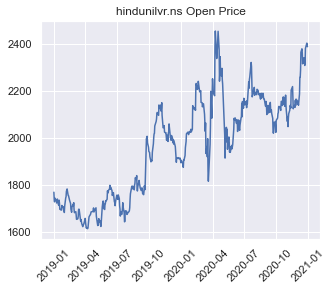

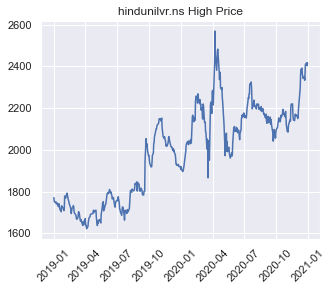

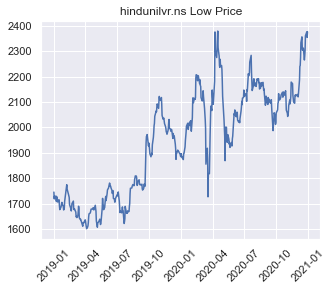

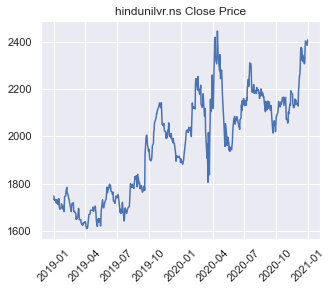

In [11]:
#Plotting Open, High, Low and Close Prices

plt.figure(figsize = (5,4))
plt.plot(data['Date'], data['Open'])
plt.title(tckr + ' Open Price')
plt.xticks(rotation = 45)

plt.figure(figsize = (5,4))
plt.plot(data['Date'], data['High'])
plt.title(tckr + ' High Price')
plt.xticks(rotation = 45)

plt.figure(figsize = (5,4))
plt.plot(data['Date'], data['Low'])
plt.title(tckr + ' Low Price')
plt.xticks(rotation = 45)

plt.figure(figsize = (5,4))
plt.plot(data['Date'], data['Close'])
plt.title(tckr + ' Close Price')
plt.xticks(rotation = 45)

We will now create a deep copy of our data, so that a separate memory location is created for all the changes we make. For this, we will have to import 'copy'.
The variable name of the copy will be 'ta_df', which represents a dataframe of technical analysis.

In [12]:
# Creating a deep copy of the data

import copy
ta_df = copy.deepcopy(data)
ta_df.head()

,Date,Open,High,Low,Close
0,2019-01-01,1771.034617,1771.034617,1745.363862,1748.032837
1,2019-01-02,1739.589151,1755.554424,1719.110860,1732.018921
2,2019-01-03,1730.077874,1750.313531,1730.077874,1735.707031
3,2019-01-04,1745.897640,1748.906278,1719.935796,1729.204346
4,2019-01-07,1738.715825,1750.847529,1729.932424,1732.358765


In [13]:
#Calculating Daily Return and its Cumulative

ta_df['Daily Return'] = ta_df.Close.pct_change().fillna(0)
ta_df['Cumulative Daily Return'] = (1+ta_df['Daily Return']).cumprod().fillna(0)

Daily return represents a percentage change in the closing price, from the previous day's closing price. 

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

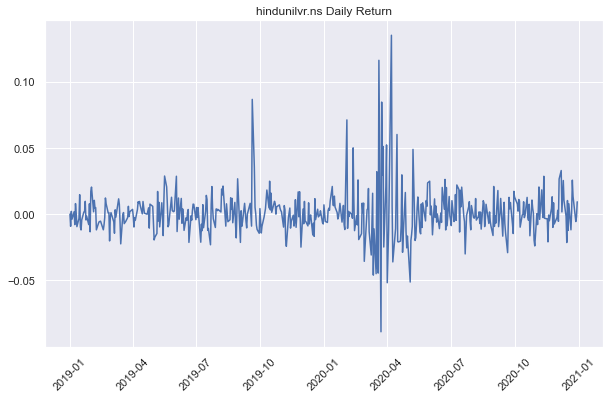

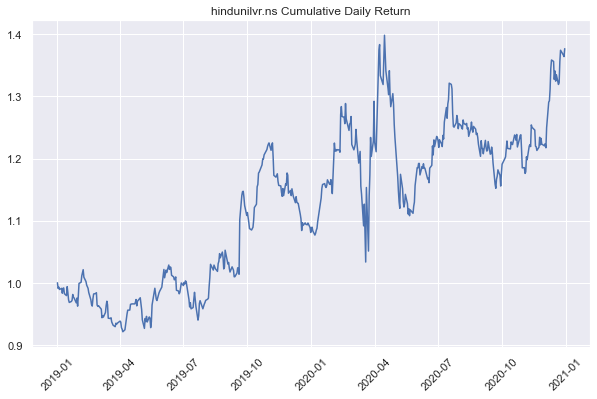

In [14]:
#Plotting the Daily Return and its Cumulative

plt.figure(figsize = (10,6))
plt.plot(ta_df['Date'], ta_df['Daily Return'])
plt.title(tckr + ' Daily Return')
plt.xticks(rotation = 45)

plt.figure(figsize = (10,6))
plt.plot(ta_df['Date'], ta_df['Cumulative Daily Return'])
plt.title(tckr + ' Cumulative Daily Return')
plt.xticks(rotation = 45)

In [15]:
#Calculating 15, 30 and 100 Day Moving Averages

ta_df['15-Day Moving Average'] = ta_df.Close.shift(1).rolling(window=15).mean()
ta_df['30-Day Moving Average'] = ta_df.Close.shift(1).rolling(window=30).mean()
ta_df['100-Day Moving Average'] = ta_df.Close.shift(1).rolling(window=100).mean()

Moving Average will help us to smoothen the data by filtering some of the noise. It simply calculates the average over a certain window or a time frame. We have taken a window of 15, 30 and 100 days.
As the number of days increases, the plot appears smoother. Therefore, a 100 day Moving Average will be a lot smoother than a 15 day Moving Average. 
This can also be seen in the plot below.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

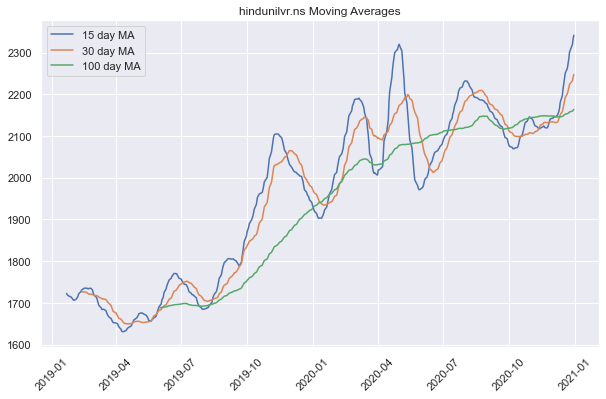

In [16]:
#Plotting the Moving Averages

plt.figure(figsize = (10,6))
plt.plot(ta_df['Date'], ta_df['15-Day Moving Average'], label = '15 day MA')
plt.plot(ta_df['Date'], ta_df['30-Day Moving Average'], label = '30 day MA')
plt.plot(ta_df['Date'], ta_df['100-Day Moving Average'], label = '100 day MA')
plt.legend(loc = 'best')
plt.title(tckr + ' Moving Averages')
plt.xticks(rotation = 45)

In [17]:
#Calculating 12 and 26 Day Exponential Moving Average

ta_df['12-Day EMA'] = ta_df.Close.ewm(span = 12).mean()
ta_df['26-Day EMA'] = ta_df.Close.ewm(span = 26).mean()

Exponential Moving Average gives higher weightage to more recent values and lower weightage to past values. A Simple Moving Average on the other hand, will give equal weightage to all values. Therefore, we can observe in the plot, that even a 12 day EMA appears smoother than a 15 day MA in the beginning, and it is less smooth as it shifts to the right.

We will calculate a EMA of 12 days and 26 days. This will also help us to calculate the next indicator, that is, Moving Average Convergence Divergence. 

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

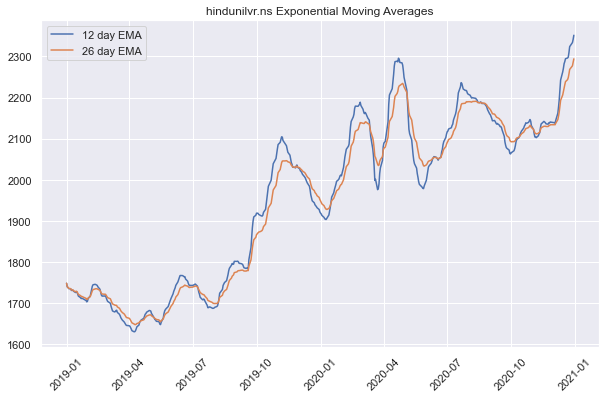

In [18]:
#Plotting the Exponential Moving Averages

plt.figure(figsize = (10,6))
plt.plot(ta_df['Date'], ta_df['12-Day EMA'], label = '12 day EMA')
plt.plot(ta_df['Date'], ta_df['26-Day EMA'], label = '26 day EMA')
plt.legend(loc = 'best')
plt.title(tckr + ' Exponential Moving Averages')
plt.xticks(rotation = 45)

In [19]:
#Calculating Moving Average Convergence Divergence

ta_df['MACD'] = (ta_df['12-Day EMA'] - ta_df['26-Day EMA'])
ta_df['MACD Signal'] = ta_df.MACD.ewm(span=9, min_periods =9 ).mean()
ta_df['MACD Histogram'] = (ta_df['MACD'] - ta_df['MACD Signal'])

Moving Average Convergence Divergence (MACD) can be calculated by subtracting a 26 day EMA from a 12 day EMA. This results in the MACD line. The Signal Line can then be calculated by taking a 9 period EMA of the MACD Line. The Histogram is the difference between the MACD and Signal Line. 

MACD above Signal Line represents a buy signal and MACD below the Signal Line represents a sell signal.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

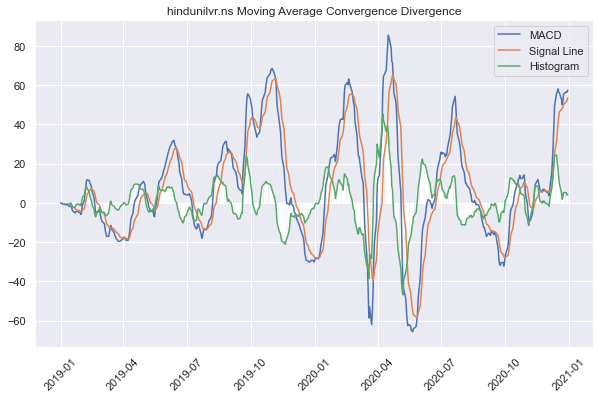

In [20]:
#Plotting MACD

plt.figure(figsize=(10,6))
plt.plot(ta_df['Date'], ta_df['MACD'], label = 'MACD')
plt.plot(ta_df['Date'], ta_df['MACD Signal'], label = 'Signal Line')
plt.plot(ta_df['Date'], ta_df['MACD Histogram'], label = 'Histogram')
plt.bar(ta_df['Date'], ta_df['MACD Histogram'], width=0.5, snap=False)
plt.legend(loc='best')
plt.title(tckr + ' Moving Average Convergence Divergence')
plt.xticks(rotation=45)

In [21]:
#Calculating Bollinger Bands

window = 20
sd = 2

rolling_average = ta_df.Close.rolling(window).mean()
rolling_sd = ta_df.Close.rolling(window).std()

ta_df['Mean Band'] = rolling_average
ta_df['Upper Band'] = (rolling_average + (rolling_sd * sd))
ta_df['Lower Band'] = (rolling_average - (rolling_sd * sd))

Bollinger Bands indicate volatility. A Moving Average of a 20 day period is taken, and two bands are calculated, which are placed two standard deviations above and below the 20 day MA. This can also be seen in the plot below.

Bollinger Bands expand when there is higher volatility, and contract as the volatility reduces.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

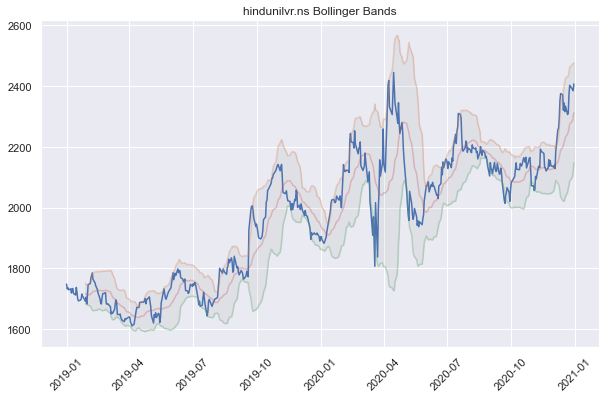

In [22]:
#Plotting Bollinger Bands

plt.figure(figsize=(10,6))
plt.plot(ta_df['Date'], ta_df['Close'])
plt.plot(ta_df['Date'], ta_df['Upper Band'], alpha=0.3)
plt.plot(ta_df['Date'], ta_df['Lower Band'], alpha=0.3)
plt.plot(ta_df['Date'], ta_df['Mean Band'], alpha=0.3)
plt.fill_between(ta_df['Date'], ta_df['Upper Band'], ta_df['Lower Band'], color='grey', alpha=0.1)
plt.title(tckr + ' Bollinger Bands')
plt.xticks(rotation = 45)

In [23]:
#Calculating Relative Strength Index and Williams % R

ta_df['RSI'] = talib.RSI(ta_df.Close.values, timeperiod = 14)
ta_df['Williams%R'] = talib.WILLR(ta_df.High.values, ta_df.Low.values, ta_df.Close.values, 14)

Relative Strength Index (RSI) and Williams % R are momentum indicators, which are calculated over a window of 14 days.

RSI ranges from 0 to 100 and has cut off lines of either 20/80 or 30/70. While some traders use the former cut off points, others prefer to use the latter. Therefore, in the plot below we have specified both the cut off lines. When the trend crosses the 70 or 80 cut off, it indicates strength in the market. On the contrary, when it crosses the 30 or 20 line, it indicates weakness in the market.

Williams % R is calculated by taking the Highest of the high price and Lowest of the low price. This forms a range, from 0 to -100. A trend above -20 indicates an overbought situation and below -80 indicates an oversold situation in the market.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

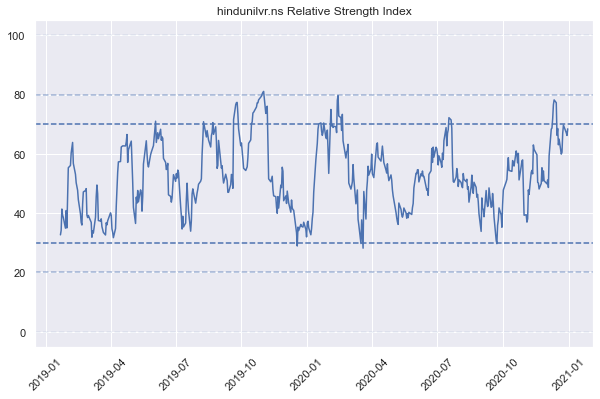

In [24]:
#Plotting Relative Strength Index

plt.figure(figsize=(10,6))
plt.plot(ta_df['Date'], ta_df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)

plt.title(tckr + ' Relative Strength Index')
plt.xticks(rotation=45)

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

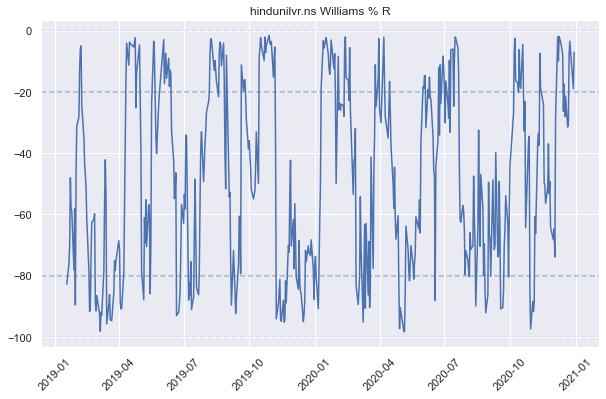

In [25]:
#Plotting Williams % R

plt.figure(figsize=(10,6))
plt.plot(ta_df['Date'], ta_df['Williams%R'])

plt.axhline(-100, linestyle='--', alpha=0.1)
plt.axhline(-80, linestyle='--', alpha=0.5)


plt.axhline(-20, linestyle='--', alpha=0.5)
plt.axhline(0, linestyle='--', alpha=0.1)

plt.title(tckr + ' Williams % R')
plt.xticks(rotation=45)

In [26]:
#Calculating Ichimoku Cloud

high_9 = ta_df['High'].rolling(window = 9, center = False).max()
low_9 = ta_df['Low'].rolling(window = 9, center = False).min()
high_26 = ta_df['High'].rolling(window = 26, center = False).max()
low_26 = ta_df['Low'].rolling(window = 26, center = False).min() 
high_52 = ta_df['High'].rolling(window = 52, center = False).max()
low_52 = ta_df['Low'].rolling(window = 52, center = False).min()

ta_df['Conversion Line'] = (high_9 + low_9)/2
ta_df['Base Line'] = (high_26 + low_26)/2
ta_df['Leading Span A'] = ((ta_df['Conversion Line'] + ta_df['Base Line']) / 2).shift(26) 
ta_df['Leading Span B'] = ((high_52 + low_52)/2).shift(26)

Ichimoku Cloud shows market trend, momentum and support & resistance. 

The Conversion Line and Base Line can be calculated by taking an average of Highest high and Lowest low for a period of 9 days and 26 days respectively. The crossovers between the two lines indicate buy and sell signals.

Leading Span A indicates the average of Conversion Line and Base Line for 26 days. Leading Span B indicates the average of Highest high and Lowest low prices, for 52 days. The shaded region between Leading Span A and Leading Span B, forms the Ichimoku Cloud. 
This can also be seen in the plot below.

(array([17897., 17987., 18078., 18170., 18262., 18353., 18444., 18536.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

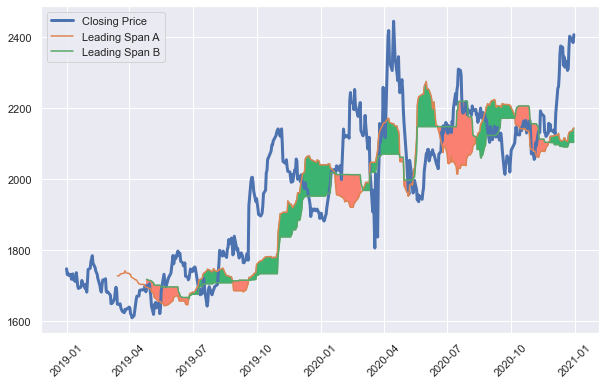

In [27]:
#Plotting Ichimoku Cloud

fig,ax = plt.subplots(1,1,sharex=True,figsize = (10,6))
ax.plot(ta_df['Date'], ta_df['Close'],linewidth=3, label = 'Closing Price')
ax.plot(ta_df['Date'], ta_df['Leading Span A'], label = 'Leading Span A')
ax.plot(ta_df['Date'], ta_df['Leading Span B'], label = 'Leading Span B')
ax.fill_between(ta_df['Date'],ta_df['Leading Span A'],ta_df['Leading Span B'],where = ta_df['Leading Span A'] >=  ta_df['Leading Span B'], color = 'mediumseagreen')
ax.fill_between(ta_df['Date'], ta_df['Leading Span A'], ta_df['Leading Span B'],where = ta_df['Leading Span A'] <  ta_df['Leading Span B'], color = 'salmon')
plt.legend(loc='best')
plt.title = (tckr + ' Ichimoku Cloud')
plt.xticks(rotation = 45)

In the above plot, the blue line indicates the closing price of the stock. Ichimoku cloud below the price indicates a buy signal. This is represented by the salmon color. 
On the other hand, Ichimoku cloud above the price indicates a sell signal, which is represented by a green color. 

Finally, we can look at the last 5 rows of our 'ta_df' Data Frame, which shows a summary of all the technical indicators calculated for each trading day.  

In [28]:
#Data Frame of Technical Indicators

ta_df.tail()

,Date,Open,High,Low,Close,Daily Return,Cumulative Daily Return,15-Day Moving Average,30-Day Moving Average,100-Day Moving Average,...,MACD Histogram,Mean Band,Upper Band,Lower Band,RSI,Williams%R,Conversion Line,Base Line,Leading Span A,Leading Span B
486,2020-12-23,2320.0,2377.300049,2303.250000,2370.350098,0.025682,1.356010,2285.683317,2215.725008,2155.861019,...,3.107838,2260.844995,2447.793011,2073.896979,66.875845,-8.165175,2328.250000,2243.199951,2130.699951,2102.793056
487,2020-12-24,2382.5,2410.000000,2360.050049,2402.250000,0.013458,1.374259,2301.086654,2223.651676,2157.607657,...,5.319968,2274.164990,2461.575948,2086.754033,69.698777,-3.475336,2337.550049,2252.500000,2133.412537,2103.768154
488,2020-12-28,2405.0,2417.399902,2376.050049,2388.899902,-0.005557,1.366622,2319.386654,2232.506673,2159.726945,...,5.118145,2285.899988,2471.061030,2100.738946,67.120723,-16.078984,2341.250000,2256.199951,2136.250061,2103.768154
489,2020-12-29,2395.0,2403.000000,2354.199951,2384.300049,-0.001926,1.363990,2333.033317,2241.098340,2161.779301,...,3.960638,2298.204993,2474.536566,2121.873419,66.211966,-19.006530,2341.250000,2256.199951,2142.425049,2103.768154
490,2020-12-30,2390.0,2414.649902,2376.000000,2406.600098,0.009353,1.376748,2341.576660,2247.505005,2163.817948,...,3.972468,2311.882495,2476.309906,2147.455084,68.442650,-7.091148,2341.250000,2256.199951,2144.050049,2103.768154
